In [81]:
import numpy as np

class Perceptron(object):
    def __init__(self,epochs,epsilon):
        self.epochs=epochs
        self.epsilon=epsilon
    
    def train(self,X,y):
        self.w=np.random.rand(2)
        self.b=np.random.rand()
        for _ in range(self.epochs):
            total_error=0
            for i in range(len(X)):
                z=self.w.dot(X[i])+self.b
                y_hat=1 if z>0 else -1
                self.w=self.w-(1/2)*(y_hat-y[i])*X[i]
                self.b=self.b-(1/2)*(y_hat-y[i])
                total_error += 1/4 * (y_hat-y[i])**2
            if total_error<self.epsilon:
                break
        return self
    
    def predict(self,X):
        z=np.dot(X,self.w)+self.b
        return np.where(z>=0,1,-1)

In [82]:
# Data of Palmer_Penguins.csv
# First import the standard data science libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

#load data
df_pp=pd.read_csv('Datasets/palmer_penguins.csv')
df_pp
filt=df_pp['bill_length_mm'].isna()==1
df_pp=df_pp[~filt]
df_pp

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...,...
338,338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [83]:
#check the species category study the species with length and depth
df_pp['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

       species  bill_length_mm  bill_depth_mm
0       Adelie            39.1           18.7
1       Adelie            39.5           17.4
2       Adelie            40.3           18.0
4       Adelie            36.7           19.3
5       Adelie            39.3           20.6
..         ...             ...            ...
215  Chinstrap            55.8           19.8
216  Chinstrap            43.5           18.1
217  Chinstrap            49.6           18.2
218  Chinstrap            50.8           19.0
219  Chinstrap            50.2           18.7

[219 rows x 3 columns]


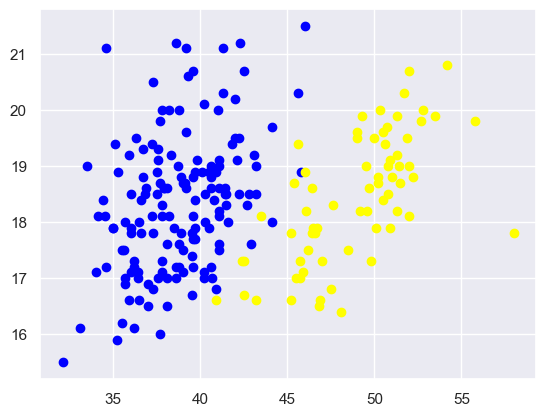

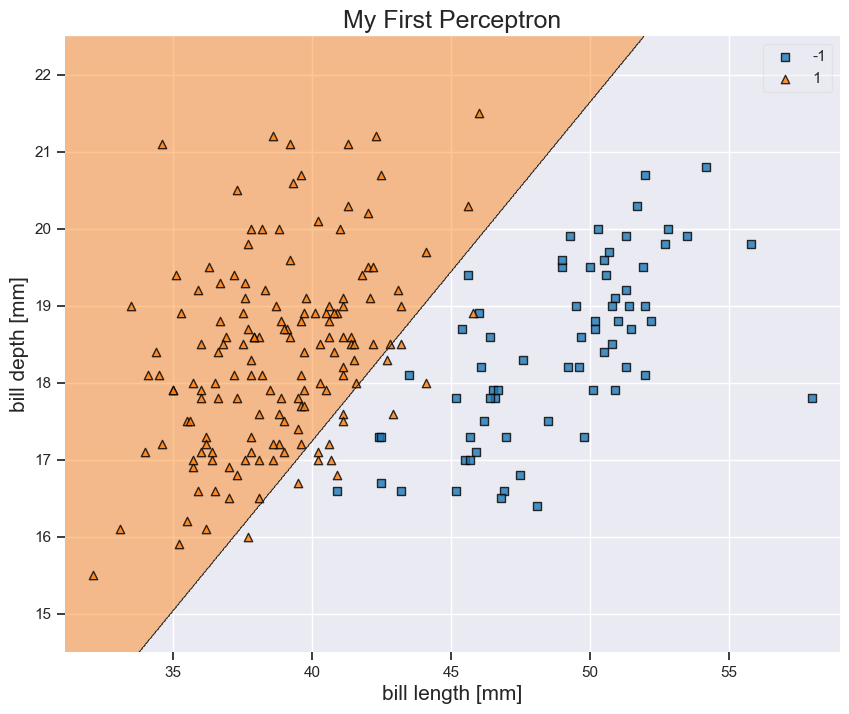

In [84]:
#For species, choose Adelie and Chinstrap
target_data=df_pp[['species','bill_length_mm','bill_depth_mm']]
filt=df_pp['species'].isin(['Adelie','Chinstrap'])
target_data=target_data[filt]
print(target_data)
filt=target_data['species']=='Adelie'
plt.scatter(target_data.loc[filt,'bill_length_mm'],target_data.loc[filt,'bill_depth_mm'],color='blue')
plt.scatter(target_data.loc[~filt,'bill_length_mm'],target_data.loc[~filt,'bill_depth_mm'],color='yellow')
# We can see there is also a hyperplane for species Adelie and Chinstrap.

#function that tranforms species into numbers
def species_to_number(species):
    if species=='Adelie':
        return 1
    else:
        return -1
    
#get the data for Perceptron
target_data['species']=target_data['species'].apply(species_to_number)
X=target_data[['bill_length_mm','bill_depth_mm']].values
y=target_data['species'].values

perceptron=Perceptron(epochs=10000,epsilon=10**(-8))
perceptron.train(X,y)
perceptron.predict(X)

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = perceptron)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.show()

C:\Users\pangnaiwen\AppData\Local\Temp\ipykernel_30064\4110919779.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['species']=target_data['species'].apply(species_to_number)


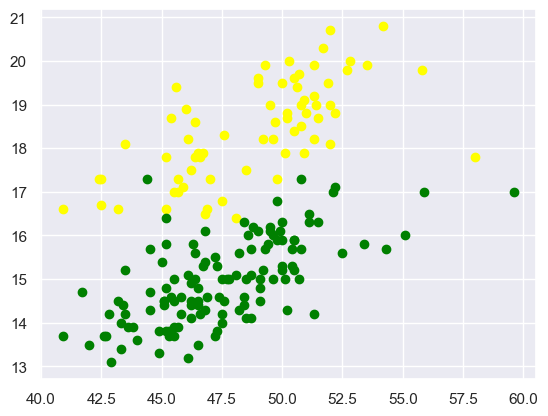

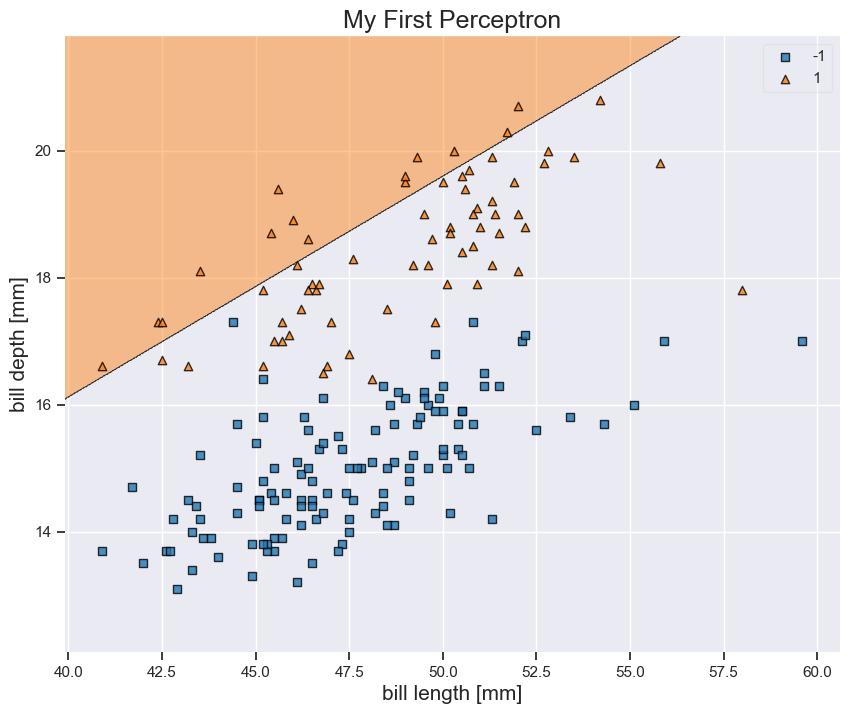

In [85]:
df_pp['species'].unique()
filt=df_pp['species'].isin(['Chinstrap','Gentoo'])
target_data=df_pp[filt]
filt=target_data['species']=='Chinstrap'
plt.scatter(target_data.loc[filt,'bill_length_mm'],target_data.loc[filt,'bill_depth_mm'],color='yellow')
plt.scatter(target_data.loc[~filt,'bill_length_mm'],target_data.loc[~filt,'bill_depth_mm'],color='green')
# We can see there is also a hyperplane for species Adelie and Chinstrap.

#function that tranforms species into numbers
def species_to_number(species):
    if species=='Chinstrap':
        return 1
    else:
        return -1
    
#get the data for Perceptron
target_data['species']=target_data['species'].apply(species_to_number)
X=target_data[['bill_length_mm','bill_depth_mm']].values
y=target_data['species'].values

perceptron=Perceptron(epochs=10000,epsilon=10**(-8))
perceptron.train(X,y)
perceptron.predict(X)

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = perceptron)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.show()